# Module 12 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [1]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup as soup
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [3]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [4]:
# Create a Beautiful Soup Object
html = browser.html
soup = soup(html, 'html.parser')

In [5]:
# Extract all rows of data
table = soup.find('table')

# Find all the rows in the table
rows = table.find_all('tr')

# Initialize a list to store the scraped data
data = []

# Loop through all the rows
for row in rows:
    # Find all the columns in the row
    columns = row.find_all('td')
    # Convert the columns to text and store them in a list
    row_data = [column.text for column in columns]
    # Append the row data to the list of scraped data
    data.append(row_data)


### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [6]:
# Create an empty list
rows = []
# Loop through the scraped data to create a list of rows
for row_data in data:
    rows.append(row_data)

In [7]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
# Define the column names
column_names = ['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure']

# Create a Pandas DataFrame from the list of rows and the list of column names
df = pd.DataFrame(rows, columns=column_names)

In [8]:
# Confirm DataFrame was created successfully
# Check the shape of the DataFrame
print("The shape of the DataFrame is:", df.shape)

# Display the first few rows of the DataFrame
print("The first few rows of the DataFrame:")
print(df.head())

The shape of the DataFrame is: (1868, 7)
The first few rows of the DataFrame:
     id terrestrial_date   sol    ls month min_temp pressure
0  None             None  None  None  None     None     None
1     2       2012-08-16    10   155     6    -75.0    739.0
2    13       2012-08-17    11   156     6    -76.0    740.0
3    24       2012-08-18    12   156     6    -76.0    741.0
4    35       2012-08-19    13   157     6    -74.0    732.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [9]:
# Examine data type of each column
print(df.dtypes)

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object


In [10]:
# Change data types for data analysis
# Fill missing values in the 'sol' column with 0
df['sol'].fillna(0, inplace=True)

# Convert the 'sol' column to an integer data type
df['sol'] = df['sol'].astype(int)

# Convert the 'terrestrial_date' column to a datetime data type
df['terrestrial_date'] = pd.to_datetime(df['terrestrial_date'])

# Convert the 'sol' column to an integer data type
df['sol'] = df['sol'].astype(int)

# Convert the 'ls' column to a float data type
df['ls'] = df['ls'].astype(float)

# Convert the 'min_temp' column to a float data type
df['min_temp'] = df['min_temp'].astype(float)

# Convert the 'pressure' column to a float data type
df['pressure'] = df['pressure'].astype(float)

In [11]:
# Confirm type changes were successful by examining data types again
print(df.dtypes)

id                          object
terrestrial_date    datetime64[ns]
sol                          int64
ls                         float64
month                       object
min_temp                   float64
pressure                   float64
dtype: object


### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [12]:
# 1. How many months are there on Mars?
num_months = df['month'].nunique()
print("There are", num_months, "months on Mars.")

There are 12 months on Mars.


In [13]:
# 2. How many Martian days' worth of data are there?
num_sols = df['sol'].nunique()
print("There are", num_sols, "Martian days' worth of data.")

There are 1868 Martian days' worth of data.


In [14]:
# 3. What is the average low temperature by month?
avg_temp_by_month = df.groupby(['month'])['min_temp'].mean()
print("The average low temperature by month is:\n", avg_temp_by_month)

The average low temperature by month is:
 month
1    -77.160920
10   -71.982143
11   -71.985507
12   -74.451807
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
Name: min_temp, dtype: float64


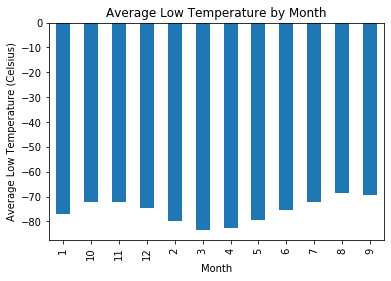

In [15]:
# Plot the average temperature by month
avg_temp_by_month.plot(kind='bar', title='Average Low Temperature by Month')
plt.xlabel('Month')
plt.ylabel('Average Low Temperature (Celsius)')
plt.show()

In [16]:
# Identify the coldest and hottest months in Curiosity's location
coldest_month = avg_temp_by_month.idxmin()
hottest_month = avg_temp_by_month.idxmax()
print("The coldest month is:", coldest_month)
print("The hottest month is:", hottest_month)

The coldest month is: 3
The hottest month is: 8


In [17]:
# 4. Average pressure by Martian month
avg_pressure_by_month = df.groupby('month')['pressure'].mean()
print(avg_pressure_by_month)

month
1     862.488506
10    887.312500
11    857.014493
12    842.156627
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
Name: pressure, dtype: float64


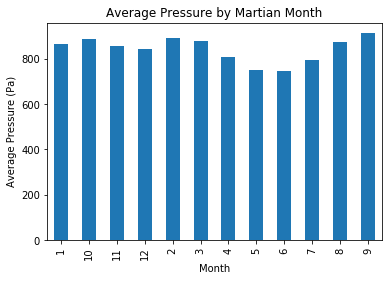

In [18]:
# Plot the average pressure by month
avg_pressure_by_month.plot(kind='bar')
plt.xlabel("Month")
plt.ylabel("Average Pressure (Pa)")
plt.title("Average Pressure by Martian Month")
plt.show()

In [19]:
# 5. How many terrestrial (earth) days are there in a Martian year?
martian_year = 687
print(martian_year)

687


On average, the third month has the coldest minimum temperature on Mars, and the eighth month is the warmest. But it is always very cold there in human terms!



Atmospheric pressure is, on average, lowest in the sixth month and highest in the ninth.

The distance from peak to peak is roughly 1425-750, or 675 days. A year on Mars appears to be about 675 days from the plot. Internet search confirms that a Mars year is equivalent to 687 earth days.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [20]:
# Write the data to a CSV
df.to_csv('mars_weather.csv', index=False)

In [21]:
browser.quit()